In [1]:
import pandas as pd
import requests
import json

# Exercise 1

<div class="alert alert-block alert-success">
 
 Write a Python function that can be used to query data from the Worldbank Indicator API. Your
 function should:

 • take the following input parameters: indicators, countries, and years.

 • return a Pandas DataFrame of the queried data

 • have a docstring that explains what the function does, what the input parameters are, and what the output is
 
 • minimize the number of API calls necessary to retrieve the data
 
</div>

In [2]:
def query_worldbank_data(indicators, countries, years):
    """
    Queries data from the World Bank Indicator API. It is expected that users adhere to the funtion's and World Bank Indicator API contract.

    Parameters:
        indicators (list of str): List of indicator codes (e.g. 'SP.POP.TOTL' for total population).
        countries (list of str): List of country codes (ISO alpha-2) (e.g. 'DE' for Germany, 'FR' for France, or 'all' for all countries).
        years (int or tuple of int): A single year (e.g. 2012) or a tuple indicating the range of years (e.g. (2015, 2018)).

    Returns:
        pd.DataFrame: A DataFrame containing queried data
    """
    api_call_count = 0
    base_url = "https://api.worldbank.org/v2/country/{}/indicator/{}?source=2&date={}&format=json&per_page=1000"
    
    countries_str = ";".join(countries)
    indicators_str = ";".join(indicators)
    
    year_range = f"{years[0]}:{years[1]}" if isinstance(years, tuple) else str(years)
    
    url = base_url.format(countries_str, indicators_str, year_range)
    print("URL used to retrieve data:", url)

    response = requests.get(url)
    api_call_count += 1
    print("API call count:", api_call_count)

    data = response.json()[1]
    df = pd.json_normalize(data)
    
    return df


<div class="alert alert-info">
This function suits the purpose of generating data for the next tasks within this project scope. Since the focus is on three specific indicators -'SP.POP.TOTL', 'NY.GDP.MKTP.CD', and 'SP.DYN.LE00.IN'- all from the World Development Indicators (source 2), I set source=2 as the default in the URL to simplify the code. The function was tested successfully for retrieving data from source 2. However, to make it work with other sources, further enhancements would be needed. 
</div>

<div class="alert alert-block alert-success">
Demonstrate that your function works by querying the following data (codes are provided in parentheses):

a) The total population (SP.POP.TOTL) of Germany (DE) and France (FR) between 2015 and 2020.

c) State how many API calls your function makes for a) and b) respectively.

</div>

In [3]:
result_1a = query_worldbank_data(['SP.POP.TOTL'], ['DE', 'FR'], (2015, 2020))
result_1a

URL used to retrieve data: https://api.worldbank.org/v2/country/DE;FR/indicator/SP.POP.TOTL?source=2&date=2015:2020&format=json&per_page=1000
API call count: 1


,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,DEU,2020,83160871,,,0,SP.POP.TOTL,"Population, total",DE,Germany
1,DEU,2019,83092962,,,0,SP.POP.TOTL,"Population, total",DE,Germany
2,DEU,2018,82905782,,,0,SP.POP.TOTL,"Population, total",DE,Germany
3,DEU,2017,82657002,,,0,SP.POP.TOTL,"Population, total",DE,Germany
4,DEU,2016,82348669,,,0,SP.POP.TOTL,"Population, total",DE,Germany
5,DEU,2015,81686611,,,0,SP.POP.TOTL,"Population, total",DE,Germany
6,FRA,2020,67571107,,,0,SP.POP.TOTL,"Population, total",FR,France
7,FRA,2019,67388001,,,0,SP.POP.TOTL,"Population, total",FR,France
8,FRA,2018,67158348,,,0,SP.POP.TOTL,"Population, total",FR,France
9,FRA,2017,66918020,,,0,SP.POP.TOTL,"Population, total",FR,France


<div class="alert alert-block alert-success">
b) The total population (SP.POP.TOTL), GDP in current US$ (NY.GDP.MKTP.CD), and life expectancy in years at birth (SP.DYN.LE00.IN) of all countries (all) in 2012. Print the shape of the resulting DataFrame and display its first 10 rows.

c) State how many API calls your function makes for a) and b) respectively.
</div>

In [4]:
result_1b = query_worldbank_data(['SP.POP.TOTL', 'NY.GDP.MKTP.CD', 'SP.DYN.LE00.IN'], ['all'], 2012)
print("Shape of the resulting DataFrame:", result_1b.shape)
result_1b.head(10)

URL used to retrieve data: https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL;NY.GDP.MKTP.CD;SP.DYN.LE00.IN?source=2&date=2012&format=json&per_page=1000
API call count: 1
Shape of the resulting DataFrame: (798, 11)


,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value,scale
0,AFE,2012,5.525307e+08,,,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern,NaN
1,AFW,2012,3.767980e+08,,,0,SP.POP.TOTL,"Population, total",ZI,Africa Western and Central,NaN
2,ARB,2012,3.803834e+08,,,0,SP.POP.TOTL,"Population, total",1A,Arab World,NaN
3,CSS,2012,2.898802e+06,,,0,SP.POP.TOTL,"Population, total",S3,Caribbean small states,NaN
4,CEB,2012,1.039353e+08,,,0,SP.POP.TOTL,"Population, total",B8,Central Europe and the Baltics,NaN
5,EAR,2012,3.035160e+09,,,0,SP.POP.TOTL,"Population, total",V2,Early-demographic dividend,NaN
6,EAS,2012,2.243777e+09,,,0,SP.POP.TOTL,"Population, total",Z4,East Asia & Pacific,NaN
7,EAP,2012,2.001246e+09,,,0,SP.POP.TOTL,"Population, total",4E,East Asia & Pacific (excluding high income),NaN
8,TEA,2012,1.976387e+09,,,0,SP.POP.TOTL,"Population, total",T4,East Asia & Pacific (IDA & IBRD countries),NaN
9,EMU,2012,3.404507e+08,,,0,SP.POP.TOTL,"Population, total",XC,Euro area,NaN


# Exercise 2

<div class="alert alert-block alert-success">
 
The file medal_table.csv contains information about the number of medals won by each country at the
 Olympic Games 2012.

 a) Preprocess both the medal table data and the Worldbank data retrieved in exercise 1 b) and
 combine the two datasets suitably into one tidy dataset. The final dataset should be such that it
 allows you to answer the following exercises (2b and 3). Explain your actions and decisions in a few
 sentences. 
 
 Notes: 
 1. If there are missing values in the Worldbank data set (e.g. if no population
 data is available for Germany), then you do NOT need to impute these values. 
 2. Exercises 2b
 and 3 may require different handling of missing values. Therefore, it is fine if you create slightly
 different versions of the combined dataset for these exercises.
 
</div>

In [5]:
medal_data = pd.read_csv('medal_table.csv')
medal_data

,year,country,country_code,gold,silver,bronze
0,2012,United States,USA,46,28,30
1,2012,People's Republic of China,CHN,38,31,22
2,2012,Great Britain,GBR,29,17,19
3,2012,Russian Federation,RUS,20,20,27
4,2012,Republic of Korea,KOR,13,9,8
...,...,...,...,...,...,...
81,2012,Kingdom of Saudi Arabia,KSA,0,0,1
82,2012,Kuwait,KUW,0,0,1
83,2012,Morocco,MAR,0,0,1
84,2012,Tajikistan,TJK,0,0,1


In [6]:
medal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          86 non-null     int64 
 1   country       86 non-null     object
 2   country_code  86 non-null     object
 3   gold          86 non-null     int64 
 4   silver        86 non-null     int64 
 5   bronze        86 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 4.2+ KB


<div class="alert alert-warning">

At first glance, there seems to be no issue with the medal table, and it can be left as is. However, there is actually a problem:

The country codes in the medal table do not fully adhere to the ISO 3166-1 alpha-3 standard (abbreviated as ISO-3). For example, the country code for Vietnam is listed as VIE, but it should be VNM according to the ISO-3 standard. This difference exists because the International Olympic Committee (IOC) assigns a different set of codes to the nations that participate in the Olympic Games. (See the comparision at: https://simple.wikipedia.org/wiki/Comparison_of_IOC,_FIFA,_and_ISO_3166_country_codes)

This mismatch can lead to issues (NaN values) when attempting to merge two DataFrames based on the three-letter country codes, particularly for countries whose codes in both tables are not identical (such as Vietnam).

To address this issue, I added an additional column for the ISO-3 code in the medal table.

</div>

In [7]:
# These are all unique IOC country codes from the medal table DataFrame
medal_data['country_code'].unique()

array(['USA', 'CHN', 'GBR', 'RUS', 'KOR', 'GER', 'FRA', 'AUS', 'ITA',
       'HUN', 'JPN', 'IRI', 'NED', 'NZL', 'UKR', 'CUB', 'ESP', 'JAM',
       'CZE', 'RSA', 'PRK', 'BRA', 'POL', 'ETH', 'KAZ', 'CRO', 'CAN',
       'BLR', 'KEN', 'DEN', 'ROU', 'AZE', 'SUI', 'NOR', 'LTU', 'TUN',
       'SWE', 'COL', 'MEX', 'GEO', 'IRL', 'ARG', 'SRB', 'SLO', 'TTO',
       'TUR', 'DOM', 'TPE', 'LAT', 'ALG', 'BRN', 'GRN', 'BAH', 'UGA',
       'VEN', 'EGY', 'IND', 'MGL', 'THA', 'BUL', 'FIN', 'INA', 'SVK',
       'BEL', 'ARM', 'EST', 'MAS', 'PUR', 'BOT', 'CYP', 'GAB', 'GUA',
       'MNE', 'POR', 'UZB', 'GRE', 'QAT', 'SGP', 'AFG', 'CMR', 'HKG',
       'KSA', 'KUW', 'MAR', 'TJK', 'VIE'], dtype=object)

In [8]:
# And these are all unique ISO-3 country codes that appear in the World Bank data.
result_1b['countryiso3code'].unique()

array(['AFE', 'AFW', 'ARB', 'CSS', 'CEB', 'EAR', 'EAS', 'EAP', 'TEA',
       'EMU', 'ECS', 'ECA', 'TEC', 'EUU', 'FCS', 'HPC', '', 'IBD', 'IBT',
       'IDB', 'IDX', 'IDA', 'LTE', 'LCN', 'LAC', 'TLA', 'LDC', 'LMY',
       'MEA', 'MNA', 'TMN', 'MIC', 'NAC', 'OED', 'OSS', 'PSS', 'PST',
       'PRE', 'SST', 'SAS', 'TSA', 'SSF', 'SSA', 'TSS', 'WLD', 'AFG',
       'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB',
       'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM',
       'CAF', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM', 'COD', 'COG',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ',
       'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO',
       'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN',
       'GNB', 'G

In [9]:
# I looked for country codes in the medal table that don't match any country codes in the World Bank data retrieved from exercise 1b
list_1 = medal_data['country_code'].unique().tolist()
list_2 = result_1b['countryiso3code'].unique().tolist()
not_matching_codes = [code for code in list_1 if code not in list_2]
print("Not matching country codes:", not_matching_codes)

Not matching country codes: ['GER', 'IRI', 'NED', 'RSA', 'CRO', 'DEN', 'SUI', 'SLO', 'TPE', 'LAT', 'ALG', 'GRN', 'BAH', 'MGL', 'BUL', 'INA', 'MAS', 'PUR', 'BOT', 'GUA', 'POR', 'GRE', 'KSA', 'KUW', 'VIE']


In [10]:
medal_data_filtered = medal_data[medal_data['country_code'].isin(not_matching_codes)]
result_1b_filtered = result_1b.groupby('countryiso3code').first().reset_index()[['countryiso3code', 'country.value']]

country_codes_comparison = pd.merge(medal_data_filtered, result_1b_filtered, left_on='country', right_on='country.value', how='left')
country_codes_comparison

# Here, I tried to determine if I could retrieve the countryiso3code based on the country name.
# However, it seems that for some countries, the names don't match exactly between the two tables.

,year,country,country_code,gold,silver,bronze,countryiso3code,country.value
0,2012,Germany,GER,11,20,13,DEU,Germany
1,2012,Islamic Republic of Iran,IRI,7,5,1,NaN,NaN
2,2012,Netherlands,NED,6,6,8,NLD,Netherlands
3,2012,South Africa,RSA,4,1,1,ZAF,South Africa
4,2012,Croatia,CRO,3,1,2,HRV,Croatia
5,2012,Denmark,DEN,2,4,3,DNK,Denmark
6,2012,Switzerland,SUI,2,2,0,CHE,Switzerland
7,2012,Slovenia,SLO,1,1,2,SVN,Slovenia
8,2012,Chinese Taipei,TPE,1,0,1,NaN,NaN
9,2012,Latvia,LAT,1,0,1,LVA,Latvia


In [11]:
# As an example, "Kingdom of Saudi Arabia" is spelled as only "Saudi Arabia" in the World Bank data (which is also the official ISO name)
result_1b[result_1b['country.value'].str.contains('Saudi Arabia')]

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value,scale
215,SAU,2012,3.082154e+07,,,0,SP.POP.TOTL,"Population, total",SA,Saudi Arabia,NaN
481,SAU,2012,7.418499e+11,,,0,NY.GDP.MKTP.CD,GDP (current US$),SA,Saudi Arabia,NaN
747,SAU,2012,7.646100e+01,,,0,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",SA,Saudi Arabia,NaN


In [12]:
# So I decided to still merge both DataFrames based on country codes and created another column in the medal table with the correct country ISO-3 code.
medal_data['countryiso3code'] = medal_data['country_code'].replace({
    'GER': 'DEU', # Germany
    'IRI': 'IRN', # Islamic Republic of Iran
    'NED': 'NLD', # Netherlands
    'RSA': 'ZAF', # South Africa
    'CRO': 'HRV', # Croatia
    'DEN': 'DNK', # Denmark
    'SUI': 'CHE', # Switzerland
    'SLO': 'SVN', # Slovenia
    'TPE': 'TWN', # Chinese Taipei
    'LAT': 'LVA', # Latvia
    'ALG': 'DZA', # Algeria
    'GRN': 'GRD', # Grenada
    'BAH': 'BHS', # The Bahamas
    'MGL': 'MNG', # Mongolia
    'BUL': 'BGR', # Bulgaria
    'INA': 'IDN', # Indonesia
    'MAS': 'MYS', # Malaysia
    'PUR': 'PRI', # Puerto Rico
    'BOT': 'BWA', # Botswana
    'GUA': 'GTM', # Guatemala
    'POR': 'PRT', # Portugal
    'GRE': 'GRC', # Greece
    'KSA': 'SAU', # Kingdom of Saudi Arabia
    'KUW': 'KWT', # Kuwait
    'VIE': 'VNM', # Vietnam
})

# Source: https://www.iso.org/obp/ui/#search/code/

In [13]:
medal_data

,year,country,country_code,gold,silver,bronze,countryiso3code
0,2012,United States,USA,46,28,30,USA
1,2012,People's Republic of China,CHN,38,31,22,CHN
2,2012,Great Britain,GBR,29,17,19,GBR
3,2012,Russian Federation,RUS,20,20,27,RUS
4,2012,Republic of Korea,KOR,13,9,8,KOR
...,...,...,...,...,...,...,...
81,2012,Kingdom of Saudi Arabia,KSA,0,0,1,SAU
82,2012,Kuwait,KUW,0,0,1,KWT
83,2012,Morocco,MAR,0,0,1,MAR
84,2012,Tajikistan,TJK,0,0,1,TJK


In [14]:
# There is a specific case: Taiwan (the IOC refers to this nation as Chinese Taipei), which won 2 medals during the 2012 Olympic Games.
medal_data[medal_data['country'] == 'Chinese Taipei']

,year,country,country_code,gold,silver,bronze,countryiso3code
47,2012,Chinese Taipei,TPE,1,0,1,TWN


In [15]:
# There is actually no data for Taiwan in the World Bank data.
result_1b[result_1b['countryiso3code'] == "TWN"]

# Source: https://datahelpdesk.worldbank.org/knowledgebase/articles/114933-where-are-your-data-on-taiwan#:~:text=Taiwan%2C%20China%20is%20not%20listed%20as%20a%20separate,world%20aggregate%20and%20the%20aggregate%20for%20high-income%20countries.

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value,scale


In [16]:
# Therefore, I dropped the Chinese Taipei row from the medal table at this stage.
medal_data = medal_data[medal_data['countryiso3code'] != 'TWN']

# Now the new medal data is ready for merging
medal_data

,year,country,country_code,gold,silver,bronze,countryiso3code
0,2012,United States,USA,46,28,30,USA
1,2012,People's Republic of China,CHN,38,31,22,CHN
2,2012,Great Britain,GBR,29,17,19,GBR
3,2012,Russian Federation,RUS,20,20,27,RUS
4,2012,Republic of Korea,KOR,13,9,8,KOR
...,...,...,...,...,...,...,...
81,2012,Kingdom of Saudi Arabia,KSA,0,0,1,SAU
82,2012,Kuwait,KUW,0,0,1,KWT
83,2012,Morocco,MAR,0,0,1,MAR
84,2012,Tajikistan,TJK,0,0,1,TJK


<div class="alert alert-info">
In the World Bank data, there are more than just countries; for example, "Central Europe and the Baltics" is a region. These entries do not need to be deleted because I will use the medal data as my left table for the merge, which contains only countries.


For the DataFrame retrieved from exercise 1b, I pivoted the table to get each 'indicator.id' as a column, using 'countryiso3code' as the identifier, and renamed the columns accordingly for better visibility.
</div>

In [17]:
result_1b

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value,scale
0,AFE,2012,5.525307e+08,,,0,SP.POP.TOTL,"Population, total",ZH,Africa Eastern and Southern,NaN
1,AFW,2012,3.767980e+08,,,0,SP.POP.TOTL,"Population, total",ZI,Africa Western and Central,NaN
2,ARB,2012,3.803834e+08,,,0,SP.POP.TOTL,"Population, total",1A,Arab World,NaN
3,CSS,2012,2.898802e+06,,,0,SP.POP.TOTL,"Population, total",S3,Caribbean small states,NaN
4,CEB,2012,1.039353e+08,,,0,SP.POP.TOTL,"Population, total",B8,Central Europe and the Baltics,NaN
...,...,...,...,...,...,...,...,...,...,...,...
793,VIR,2012,7.851707e+01,,,0,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",VI,Virgin Islands (U.S.),NaN
794,PSE,2012,7.346600e+01,,,0,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",PS,West Bank and Gaza,NaN
795,YEM,2012,6.734300e+01,,,0,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",YE,"Yemen, Rep.",NaN
796,ZMB,2012,5.886700e+01,,,0,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",ZM,Zambia,NaN


In [18]:
# Pivot the table to get each 'indicator.id' as a column, using country identifiers.
result_1b_pivoted = result_1b.pivot_table(
    index=['countryiso3code'],
    columns='indicator.id',
    values='value',
    aggfunc='first'
).reset_index()

result_1b_pivoted = result_1b_pivoted.rename(columns={
    'SP.POP.TOTL': 'total_population',
    'NY.GDP.MKTP.CD': 'gdp_in_usd',
    'SP.DYN.LE00.IN': 'life_expectancy_in_years_at_birth',
}).round(2)

result_1b_pivoted

indicator.id,countryiso3code,gdp_in_usd,life_expectancy_in_years_at_birth,total_population
0,,5.171000e+13,79.04,1.342744e+09
1,ABW,2.615208e+09,75.53,1.021120e+05
2,AFE,9.526756e+11,60.05,5.525307e+08
3,AFG,1.990733e+10,61.92,3.046648e+07
4,AFW,7.377996e+11,55.34,3.767980e+08
...,...,...,...,...
257,XKX,6.163484e+09,78.28,1.807106e+06
258,YEM,3.540133e+10,67.34,2.622339e+07
259,ZAF,4.344005e+11,61.85,5.314503e+07
260,ZMB,2.550306e+10,58.87,1.474466e+07


<div class="alert alert-info">
Merge data for exercise 2b:
</div>

In [19]:
data_2b = medal_data.merge(result_1b_pivoted[['countryiso3code', 'total_population']], on='countryiso3code', how='left')
data_2b

,year,country,country_code,gold,silver,bronze,countryiso3code,total_population
0,2012,United States,USA,46,28,30,USA,3.138777e+08
1,2012,People's Republic of China,CHN,38,31,22,CHN,1.354190e+09
2,2012,Great Britain,GBR,29,17,19,GBR,6.370022e+07
3,2012,Russian Federation,RUS,20,20,27,RUS,1.433784e+08
4,2012,Republic of Korea,KOR,13,9,8,KOR,5.019985e+07
...,...,...,...,...,...,...,...,...
80,2012,Kingdom of Saudi Arabia,KSA,0,0,1,SAU,3.082154e+07
81,2012,Kuwait,KUW,0,0,1,KWT,3.394663e+06
82,2012,Morocco,MAR,0,0,1,MAR,3.335217e+07
83,2012,Tajikistan,TJK,0,0,1,TJK,7.956382e+06


In [20]:
# The merged data is now ready for use
data_2b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              85 non-null     int64  
 1   country           85 non-null     object 
 2   country_code      85 non-null     object 
 3   gold              85 non-null     int64  
 4   silver            85 non-null     int64  
 5   bronze            85 non-null     int64  
 6   countryiso3code   85 non-null     object 
 7   total_population  85 non-null     float64
dtypes: float64(1), int64(4), object(3)
memory usage: 5.4+ KB



<div class="alert alert-block alert-success">
 
 b) Create an alternative medal table for the 2012 Olympic Games by calculating the number of Gold,
 Silver, and Bronze medals won per 10 million inhabitants. Display the 10 most successful countries
 according to this alternative medal table.
 
</div>

In [21]:
# I added new columns for medals per 10 million inhabitants
data_2b['gold_per_10m'] = data_2b['gold'] / (data_2b['total_population'] / 1e7)
data_2b['silver_per_10m'] = data_2b['silver'] / (data_2b['total_population'] / 1e7)
data_2b['bronze_per_10m'] = data_2b['bronze'] / (data_2b['total_population'] / 1e7)

data_2b = data_2b[['country', 'country_code', 'countryiso3code', 'gold_per_10m', 'silver_per_10m', 'bronze_per_10m']].round(2)
data_2b

,country,country_code,countryiso3code,gold_per_10m,silver_per_10m,bronze_per_10m
0,United States,USA,USA,1.47,0.89,0.96
1,People's Republic of China,CHN,CHN,0.28,0.23,0.16
2,Great Britain,GBR,GBR,4.55,2.67,2.98
3,Russian Federation,RUS,RUS,1.39,1.39,1.88
4,Republic of Korea,KOR,KOR,2.59,1.79,1.59
...,...,...,...,...,...,...
80,Kingdom of Saudi Arabia,KSA,SAU,0.00,0.00,0.32
81,Kuwait,KUW,KWT,0.00,0.00,2.95
82,Morocco,MAR,MAR,0.00,0.00,0.30
83,Tajikistan,TJK,TJK,0.00,0.00,1.26


In [22]:
# Here are the 10 most successful countries based on the alternative medal table.
data_2b = data_2b.sort_values(by=['gold_per_10m', 'silver_per_10m', 'bronze_per_10m'], ascending=False).reset_index(drop=True)
data_2b.head(10)

,country,country_code,countryiso3code,gold_per_10m,silver_per_10m,bronze_per_10m
0,Grenada,GRN,GRD,86.27,0.00,0.00
1,The Bahamas,BAH,BHS,26.17,0.00,0.00
2,Bahrain,BRN,BRN,24.59,0.00,0.00
3,Jamaica,JAM,JAM,14.49,18.12,10.87
4,New Zealand,NZL,NZL,13.61,4.54,11.34
5,Hungary,HUN,HUN,8.06,4.03,6.05
6,Croatia,CRO,HRV,7.03,2.34,4.69
7,Trinidad and Tobago,TTO,TTO,6.99,6.99,13.98
8,Lithuania,LTU,LTU,6.69,0.00,10.04
9,Latvia,LAT,LVA,4.92,0.00,4.92


<div class="alert alert-info">
Merge data for exercise 3:
</div>

In [23]:
# Count the total number of medals per country
data_3 = medal_data.copy()
data_3['num_medals'] = data_3['gold'] + data_3['silver'] + data_3['bronze'] 
data_3

,year,country,country_code,gold,silver,bronze,countryiso3code,num_medals
0,2012,United States,USA,46,28,30,USA,104
1,2012,People's Republic of China,CHN,38,31,22,CHN,91
2,2012,Great Britain,GBR,29,17,19,GBR,65
3,2012,Russian Federation,RUS,20,20,27,RUS,67
4,2012,Republic of Korea,KOR,13,9,8,KOR,30
...,...,...,...,...,...,...,...,...
81,2012,Kingdom of Saudi Arabia,KSA,0,0,1,SAU,1
82,2012,Kuwait,KUW,0,0,1,KWT,1
83,2012,Morocco,MAR,0,0,1,MAR,1
84,2012,Tajikistan,TJK,0,0,1,TJK,1


In [24]:
# In exercise 3 I'll train a machine learning model with linear regression so I have to conduct a table with the features (gdp_in_usd, life_expectancy_in_years_at_birth, total_population) and the target (num_medals) 
data_3 = data_3[['countryiso3code', 'num_medals']].merge(result_1b_pivoted, on='countryiso3code', how='left').round(2)
data_3

,countryiso3code,num_medals,gdp_in_usd,life_expectancy_in_years_at_birth,total_population
0,USA,104,1.625397e+13,78.74,3.138777e+08
1,CHN,91,8.532185e+12,76.19,1.354190e+09
2,GBR,65,2.707090e+12,80.90,6.370022e+07
3,RUS,67,2.208294e+12,70.07,1.433784e+08
4,KOR,30,1.278047e+12,80.82,5.019985e+07
...,...,...,...,...,...
80,SAU,1,7.418499e+11,76.46,3.082154e+07
81,KWT,1,1.740477e+11,78.81,3.394663e+06
82,MAR,1,1.069374e+11,71.68,3.335217e+07
83,TJK,1,7.633037e+09,68.48,7.956382e+06


In [25]:
data_3.isna().sum()

countryiso3code                      0
num_medals                           0
gdp_in_usd                           1
life_expectancy_in_years_at_birth    0
total_population                     0
dtype: int64

In [26]:
data_3[data_3['gdp_in_usd'].isna()]

,countryiso3code,num_medals,gdp_in_usd,life_expectancy_in_years_at_birth,total_population
20,PRK,6,NaN,71.63,24887770.0


In [27]:
# There is no gdp_in_usd for North Korea so I dropped the row
data_3 = data_3.dropna(axis=0)[['num_medals', 'gdp_in_usd', 'life_expectancy_in_years_at_birth', 'total_population']]
data_3

,num_medals,gdp_in_usd,life_expectancy_in_years_at_birth,total_population
0,104,1.625397e+13,78.74,3.138777e+08
1,91,8.532185e+12,76.19,1.354190e+09
2,65,2.707090e+12,80.90,6.370022e+07
3,67,2.208294e+12,70.07,1.433784e+08
4,30,1.278047e+12,80.82,5.019985e+07
...,...,...,...,...
80,1,7.418499e+11,76.46,3.082154e+07
81,1,1.740477e+11,78.81,3.394663e+06
82,1,1.069374e+11,71.68,3.335217e+07
83,1,7.633037e+09,68.48,7.956382e+06


In [28]:
# Now the DataFrame for exercise 3 should be ready for use
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 84
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   num_medals                         84 non-null     int64  
 1   gdp_in_usd                         84 non-null     float64
 2   life_expectancy_in_years_at_birth  84 non-null     float64
 3   total_population                   84 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.3 KB


# Exercise 3

<div class="alert alert-block alert-success">
Carry out a simple supervised machine learning experiment, in which you train a model to predict the number of medals a country wins at the Olympic Games based on demographic and economic features.
Note: Since machine learning is not a focus topic of this course, you do not need to optimize the model. Just demonstrate that you are able to apply the steps we discussed in the course and correctly interpret the results.
 
</div>

<div class="alert alert-block alert-success">
 a) Train and evaluate a linear regression model: 

 1. Split your data into a training and a test set.
 
 2. Train a linear regression model using population, life expectancy and the GDP per capita of a country as features. 3. Evaluate the model using the root mean squared error as the performance metric.
 
</div>

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [30]:
X = data_3[['gdp_in_usd','life_expectancy_in_years_at_birth','total_population']]   # Features
y = data_3['num_medals']                                                            # Target

In [31]:
X

,gdp_in_usd,life_expectancy_in_years_at_birth,total_population
0,1.625397e+13,78.74,3.138777e+08
1,8.532185e+12,76.19,1.354190e+09
2,2.707090e+12,80.90,6.370022e+07
3,2.208294e+12,70.07,1.433784e+08
4,1.278047e+12,80.82,5.019985e+07
...,...,...,...
80,7.418499e+11,76.46,3.082154e+07
81,1.740477e+11,78.81,3.394663e+06
82,1.069374e+11,71.68,3.335217e+07
83,7.633037e+09,68.48,7.956382e+06


In [32]:
y

0     104
1      91
2      65
3      67
4      30
     ... 
80      1
81      1
82      1
83      1
84      1
Name: num_medals, Length: 84, dtype: int64

### Data inspection

In [33]:
data_3.describe()

,num_medals,gdp_in_usd,life_expectancy_in_years_at_birth,total_population
count,84.000000,8.400000e+01,84.000000,8.400000e+01
mean,11.297619,8.377604e+11,74.872262,6.597163e+07
std,18.673336,2.141232e+12,6.076124,2.034064e+08
min,1.000000,7.998815e+08,57.790000,1.159120e+05
25%,2.000000,4.576103e+10,72.300000,4.551675e+06
50%,4.000000,2.017946e+11,75.305000,1.124184e+07
75%,11.250000,5.753717e+11,80.182500,4.603008e+07
max,104.000000,1.625397e+13,83.450000,1.354190e+09


Use **scatterplots** to visualize the relationship between the target variable and each individual feature.

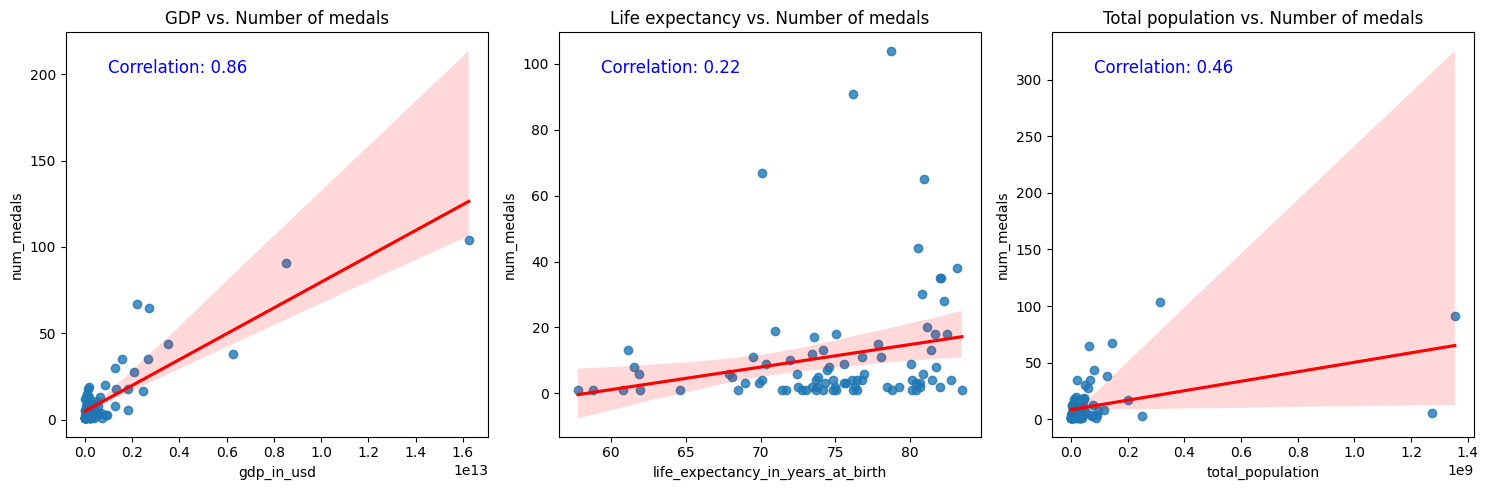

In [34]:
corr_gdp = data_3['gdp_in_usd'].corr(data_3['num_medals'])
corr_life_expectancy = data_3['life_expectancy_in_years_at_birth'].corr(data_3['num_medals'])
corr_population = data_3['total_population'].corr(data_3['num_medals'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.regplot(x='gdp_in_usd', y='num_medals', data=data_3, ax=axes[0], line_kws={'color': 'red'})
axes[0].set_title('GDP vs. Number of medals')
axes[0].text(0.1, 0.9, f'Correlation: {corr_gdp:.2f}', transform=axes[0].transAxes, fontsize=12, color='blue')

sns.regplot(x='life_expectancy_in_years_at_birth', y='num_medals', data=data_3, ax=axes[1], line_kws={'color': 'red'})
axes[1].set_title('Life expectancy vs. Number of medals')
axes[1].text(0.1, 0.9, f'Correlation: {corr_life_expectancy:.2f}', transform=axes[1].transAxes, fontsize=12, color='blue')

sns.regplot(x='total_population', y='num_medals', data=data_3, ax=axes[2], line_kws={'color': 'red'})
axes[2].set_title('Total population vs. Number of medals')
axes[2].text(0.1, 0.9, f'Correlation: {corr_population:.2f}', transform=axes[2].transAxes, fontsize=12, color='blue')

plt.tight_layout()
plt.show()

<div class="alert alert-info">
All three plots show a positive correlation between each feature and the number of medals. Plots 1 (GDP) and 3 (total population) show a stronger correlation (0.86 and 0.46). In these plots, data points tend to cluster at the lower end of the x-axis, with fewer points at higher values. Plot 2 (life expectancy) has the weakest correlation (0.22), with data points more evenly spread along the regression line. 
</div>

### Train-Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [36]:
X_train

,gdp_in_usd,life_expectancy_in_years_at_birth,total_population
37,3.706911e+11,75.60,45782417.0
28,5.639670e+10,61.12,43725806.0
44,2.733458e+10,73.72,1430377.0
41,5.459824e+11,76.47,41733271.0
2,2.707090e+12,80.90,63700215.0
...,...,...,...
76,2.950929e+11,82.00,5312437.0
9,1.288143e+11,75.06,9920362.0
73,6.751735e+10,69.87,29774500.0
12,8.389233e+11,81.10,16754962.0


In [37]:
X_test

,gdp_in_usd,life_expectancy_in_years_at_birth,total_population
10,6.272363e+12,83.10,127629000.0
68,2.504743e+10,80.11,1156556.0
60,9.178699e+11,68.97,250222695.0
34,4.292745e+10,73.86,2987773.0
84,1.955907e+11,73.70,89301326.0
78,3.015506e+10,57.79,21032684.0
35,4.731140e+10,75.55,11174383.0
39,1.689439e+10,72.41,3728874.0
48,2.271437e+11,74.20,37260563.0
57,3.975583e+11,76.77,69157023.0


<div class="alert alert-info">
Fit linear regression model
</div>

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Evaluate the model

In [39]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

test = pd.DataFrame({"pred":y_pred, "target":y_test})
test['error'] = test.pred - test.target
test = test.round(2)
test

,pred,target,error
10,53.81,38,15.81
68,7.44,1,6.44
60,12.65,3,9.65
34,6.16,5,1.16
84,7.68,1,6.68
78,2.52,1,1.52
35,6.62,3,3.62
39,5.65,6,-0.35
48,7.75,1,6.75
57,9.72,4,5.72


In [40]:
# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 6.8648283945955955


<div class="alert alert-block alert-success">
 b) Briefly discuss the results: How do you judge the performance? What are possible reasons for this performance? How could the model be improved?
</div>

In [41]:
min_value = data_3['num_medals'].min()
max_value = data_3['num_medals'].max()
print(f"Range of medals column: {min_value} to {max_value}")

Range of medals column: 1 to 104


<div class="alert alert-info">
Since the number of medals ranges from 1 to 104, an RMSE of about 6.86 shows a moderate error level. This means the model has some ability to predict, but there’s still room for improvement.
</div>

In [42]:
model.feature_names_in_

array(['gdp_in_usd', 'life_expectancy_in_years_at_birth',
       'total_population'], dtype=object)

In [43]:
model.coef_

array([7.20808309e-12, 2.26672446e-01, 5.20555149e-09])

In [44]:
for coef, name in zip(model.coef_, model.feature_names_in_):
    print(f"A 1 unit increase in {name} is associated with a {coef:.15f} change in number of medals.")

A 1 unit increase in gdp_in_usd is associated with a 0.000000000007208 change in number of medals.
A 1 unit increase in life_expectancy_in_years_at_birth is associated with a 0.226672445564256 change in number of medals.
A 1 unit increase in total_population is associated with a 0.000000005205551 change in number of medals.


<div class="alert alert-info">
To improve the model, I suggest considering additional factors, such as:

- The number of athletes each country sends: The higher this number, the greater the chances that the country may win more medals.
- Investment in sports, training facilities, or coaching: The more a nation invests, the better athletes they could recruit and train, possibly increasing the likelihood of winning more medals.

I would also expand the list to include more years beyond 2012 to gather additional data. Furthermore, I would explore other algorithms and compare their performance to identify the best fit for the model.

</div>

<div class="alert alert-block alert-success">
 c) Predict the number of medals a hypothetical country with a population of 10 million, life expectancy of 70 years, and a GDP per capita of 20.000 US$ would win.
</div>

In [45]:
hyp_country = pd.DataFrame([{'gdp_in_usd': 2e+11,'life_expectancy_in_years_at_birth': 70,'total_population': 1e7}])
hyp_country

,gdp_in_usd,life_expectancy_in_years_at_birth,total_population
0,2.000000e+11,70,10000000.0


In [46]:
print(f"The predicted number of medals is {round(model.predict(hyp_country)[0])}")

The predicted number of medals is 6
